# Docs = https://ipywidgets.readthedocs.io/en/stable/index.html

In [1]:
!pip install -U -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output

In [3]:
# widget packages
import ipywidgets as widgets

In [4]:
# defining some widgets
text = widgets.Text(
       value='My Text',
       description='Title', )
calendar = widgets.DatePicker(
           description='Pick a Date')
slider = widgets.FloatSlider(
         value=1,
         min=0,
         max=10.0,
         step=0.1,)
menu = widgets.Dropdown(
       options=['red', 'blue', 'green'],
       value='red',
       description='Color:')
checkbox = widgets.Checkbox(
           description='Check to invert')

In [5]:
box = widgets.VBox([text, slider, menu, calendar, checkbox ])
box

In [6]:
widgets.HBox([box, box])

In [7]:
# defining a list with the contents of our windows
children = [box, box]
# initializing a tab
tab = widgets.Tab()
# setting the tab windows 
tab.children = children
# changing the title of the first and second window
tab.set_title(0, 'box')
tab.set_title(1, 'copy of box')
tab

In [8]:
menu.options = ['red', 'blue', 'green', 'black']

In [9]:
# current value of text, checkbox and calendar 
print('Widget text has value {}, of {}'.format(text.value, type(text.value)))
print('Widget checkbox has value {}, of {}'.format(checkbox.value, type(checkbox.value)))
print('Widget calendar has value {}, of {}'.format(calendar.value, type(calendar.value)))

Widget text has value My Text, of <class 'str'>
Widget checkbox has value False, of <class 'bool'>
Widget calendar has value None, of <class 'NoneType'>


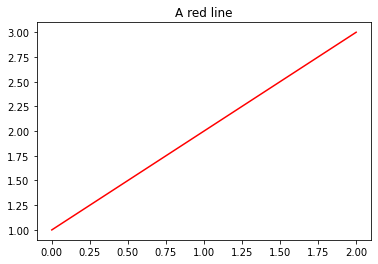

In [10]:
# We'll use the value of menu to display a plot and its title
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([1,2,3], color = menu.value)
plt.title('A {} line'.format(menu.value))
plt.show()

In [11]:
button = widgets.Button(description='My Button')
button

Button(description='My Button', style=ButtonStyle())

In [12]:
button = widgets.Button(description='My Button')
out = widgets.Output()

import datetime
def on_button_clicked(_):
      # "linking function with output"
      with out:
          # what happens when we press the button
          clear_output()
          print('Something happens! ' + str(datetime.datetime.now()))
# linking button and function together using a button's method
button.on_click(on_button_clicked)
# displaying button and its output together
widgets.VBox([button,out])

In [13]:
from IPython.display import Markdown
# Using output to display Markdown
markdown_out = widgets.Output()
with markdown_out:
    display(Markdown('Slider value is ${}$'.format(slider.value)))
markdown_out

Output()

In [14]:
import pandas as pd
import math
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown
df = pd.read_csv('https://raw.githubusercontent.com/diegopenilla/Some_Data/master/Downloads/trainingData.csv')

# DROPDOWN MENU FOR SELECTING USER-ID
users = widgets.Dropdown(
    options=list(set(df['USERID'])),
    value=1,
    description='USER-ID:',
    disabled=False)

dicti = {} # Initialize dictionary for holding {building(s): floor(s)} for each user.
# Button to display info about user
buttonuser_info = widgets.Button(description='Show Info')
outuser_info = widgets.Output()
def on_buttonuser_info_clicked(b):
    with outuser_info:
        clear_output()
        selection = df[df['USERID']==users.value]
        visited_places = len(set(selection['SPACEID']))
        dicti = {i: 0 for i in list(set(selection['BUILDINGID']))}
        for key, val in dicti.items():
            dicti[key] = list(set(df.loc[(df["USERID"] ==users.value) & (df["BUILDINGID"] == key), "FLOOR"]))
        # Extract distance travelled 
        lat = list(selection["LATITUDE"])
        long = list(selection["LONGITUDE"])
        # Calculate distance between one point and the next
        total = []
        for latitude, longitude in zip(lat, long):
            total.append((latitude, longitude))
        rez = []
        # computing distance as the distance between the coordinates x,y from one point to the next.
        # (we sorted our dataframe by time, and now we are accesing data from a user)
        for i in range(len(total)-1):
            rez.append(math.hypot(total[i+1][0] - total[i][0], total[i+1][1] - total[i][1]))   
        distance_travelled = sum(rez)
        # display, the information in Markdown to make it look better.
        display(Markdown('''For User {}, there are ${}$ observations from ${}$ WAP (*Wireless Access Points*)
- Beginning in {} and ending in {}
- Using smartphone {}
- The user travelled {:.2f} $m$ (does not take into account vertical movemement, change of floors)
- Visited places {}
- In {} locations with different SPACEID'''.format(users.value, selection.shape[0], selection.shape[1]-9,         
                                                   str(selection['TIMESTAMP'].min()), str(selection['TIMESTAMP'].max()),
                                                   str(list(set(selection['PHONEID']))[0]), distance_travelled,
                                                   str(dicti),len(set(selection['SPACEID'])))))
# Links button: buttonuser_info to its output function      
buttonuser_info.on_click(on_buttonuser_info_clicked)
# Display
display(widgets.VBox([users,buttonuser_info, outuser_info]))

In [15]:
from IPython.core.display import display, HTML, Markdown, clear_output
import json
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Defining Widgets: 
equation = widgets.Text(
            value='np.sin(X*Y)+np.cos(X+Y)',
            placeholder='Type something',
            description='Equation:')
range_ = widgets.FloatRangeSlider(
    value=[-5, 5],
    min=-100,
    step=0.1,
    description='range:',
    orientation='horizontal',
    readout=True,
    readout_format='d',)
points = widgets.IntText(
    value=50,
    description='Detail:')

# DEFINING FUNCTIONS
def plot2D(x_points):
    # I find where the letter X is in my equation text and replace by placeholders {}
    number_of_placeholders = equation.value.count('X')
    decomposed_equation = equation.value.replace('X', '{}')
    y = []
    for point in x_points:
        dicti = {i: point for i in range(number_of_placeholders)}
        decomposed_eq = decomposed_equation.format(*dicti.values())   
        # WARNING: couldn't figure out any other way, let me know if you know
        exec("""global res
res = {}""".format(decomposed_eq))
        y.append(res)
    plt.plot(x_points, y)
    plt.show()

def plot3D(X, Y, Z):
    options = {
        "width": "100%",
        "style": "surface",
        "showPerspective": True,
        "showGrid": True,
        "showShadow": True,
        "keepAspectRatio": False,
        "height": "600px"}
     # LOADING DATA
    data = [ {"x": X[y,x], 
              "y": Y[y,x], 
              "z": Z[y,x]} for y in range(Y.shape[0]) for x in range(Y.shape[1]) ]  
    visual_code = r"""
       <link href="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.css" type="text/css" rel="stylesheet" />
       <script src="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.js"></script>
       <div id="pos" style="top:0px;left:0px;position:absolute;"></div>
       <div id="visualization"></div>      
       <script type="text/javascript">
        var data = new vis.DataSet();
        data.add(""" + json.dumps(data) + """);
        var options = """ + json.dumps(options) + """;
        var container = document.getElementById("visualization");
        var graph3d = new vis.Graph3d(container, data, options);
        // setting the camera position initial
        graph3d.setCameraPosition({horizontal:0.8197963, vertical:0.945, distance:1.988})
        graph3d.on("cameraPositionChange", function(evt)
        {
            elem = document.getElementById("pos");
            elem.innerHTML = "Horizontal: " + evt.horizontal + "<br>Vertical: " + evt.vertical + "<br>Camera Distance: " + evt.distance;
        });
       </script>
    """
    html= "<iframe srcdoc='"+visual_code+"' width='75%' height='600px' style='border:10;' scrolling='no'> </iframe>"
    display(HTML(html))
    
# CREATING BUTTON
# if X and Y are inside equation.value we run plot3D
# otherwise we run plot2D
button = widgets.Button(description='Reveal Equation')
out = widgets.Output()
def on_button_clicked(b):
    global X, Y
    with out:
        clear_output()    
        # computing the x points to evaluate our function
        x_points = np.linspace(range_.value[0], 
            range_.value[1], points.value)
        X, Y = np.meshgrid(x_points, x_points)
        # WARNING: couldn't figure out any other way, let me know if you know
        exec("""global Z
Z = {}
""".format(equation.value))
        if 'Y' in equation.value and 'X' in equation.value:
            plot3D(X,Y,Z)
        elif 'Y' in equation.value:
            equation.value = equation.value.replace('Y', 'X')
            plot2D(x_points)
        else:
            plot2D(x_points)    
button.on_click(on_button_clicked)
info = Markdown("""# 2D/3D Grapher
- Write down the equation you want to plot in the Equation window. 
- If only $X$ or $Y$ is defined in the equation a 2D plot will be shown.
- If $Y$ and $X$ are defined a 3D plot will be shown.
- Detail specifies the number of points created between the specified range.""")
grapher = widgets.VBox([points, range_,  equation, button, out])
display(info, grapher)


# 2D/3D Grapher
- Write down the equation you want to plot in the Equation window. 
- If only $X$ or $Y$ is defined in the equation a 2D plot will be shown.
- If $Y$ and $X$ are defined a 3D plot will be shown.
- Detail specifies the number of points created between the specified range.

## You can use this to execute the code of other notebooks in the environment of your current notebook by %run widgets.ipynb